In [16]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# !pip install -U mglearn
# !pip install --upgrade joblib==1.1.0
# !pip install kagglehub

In [18]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("muratkokludataset/acoustic-extinguisher-fire-dataset")

# print("Path to dataset files:", path) test

## Exploratory Data Analysis 2
Using One Hot Encoding

In [19]:
file_path = "Acoustic_Extinguisher_Fire_Dataset.xlsx"
dataset = pd.read_excel(file_path)
dataset2 = dataset.copy()

Simple Correlation Analysis
- High Positive Correlation between Desibel and Frequency
- Moderate Positive Correlation between Desibel and Airflow
- High Negative Correlation between Distance and Airflow, obviously
- Moderate Negative Correlation bewtween Distance and Desibel, Frequency

<Axes: >

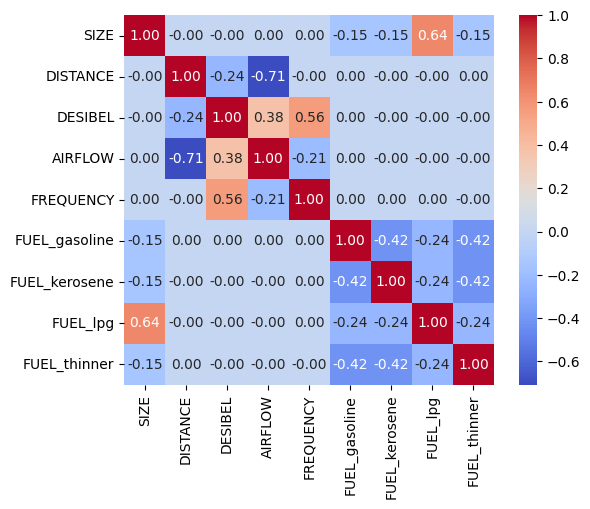

In [36]:
# one-hot encode Fuel (keeps a column for each fuel type)
dataset_ohe = pd.get_dummies(dataset2, columns=["FUEL"], drop_first=False, dtype=int)

# then drop STATUS and compute correlations on the numeric features
corr_matrix = dataset_ohe.drop(columns=["STATUS"]).corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True
)

In [37]:
dataset_ohe

,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS,FUEL_gasoline,FUEL_kerosene,FUEL_lpg,FUEL_thinner
0,1,10,96,0.0,75,0,1,0,0,0
1,1,10,96,0.0,72,1,1,0,0,0
2,1,10,96,2.6,70,1,1,0,0,0
3,1,10,96,3.2,68,1,1,0,0,0
4,1,10,109,4.5,67,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17437,7,190,86,2.2,5,0,0,0,1,0
17438,7,190,84,2.0,4,0,0,0,1,0
17439,7,190,80,1.5,3,0,0,0,1,0
17440,7,190,76,0.4,2,0,0,0,1,0


More Detailed Observation of Correlation Plot
- Stronge separation can be observed for Airflow Feature
- Slight Separation Trend can be observed from Distance Feature
- Desibel and Feature separation show mixed results. unclear separation


Text(0.5, 1.02, 'Pairwise Feature Relationships Colored by STATUS')

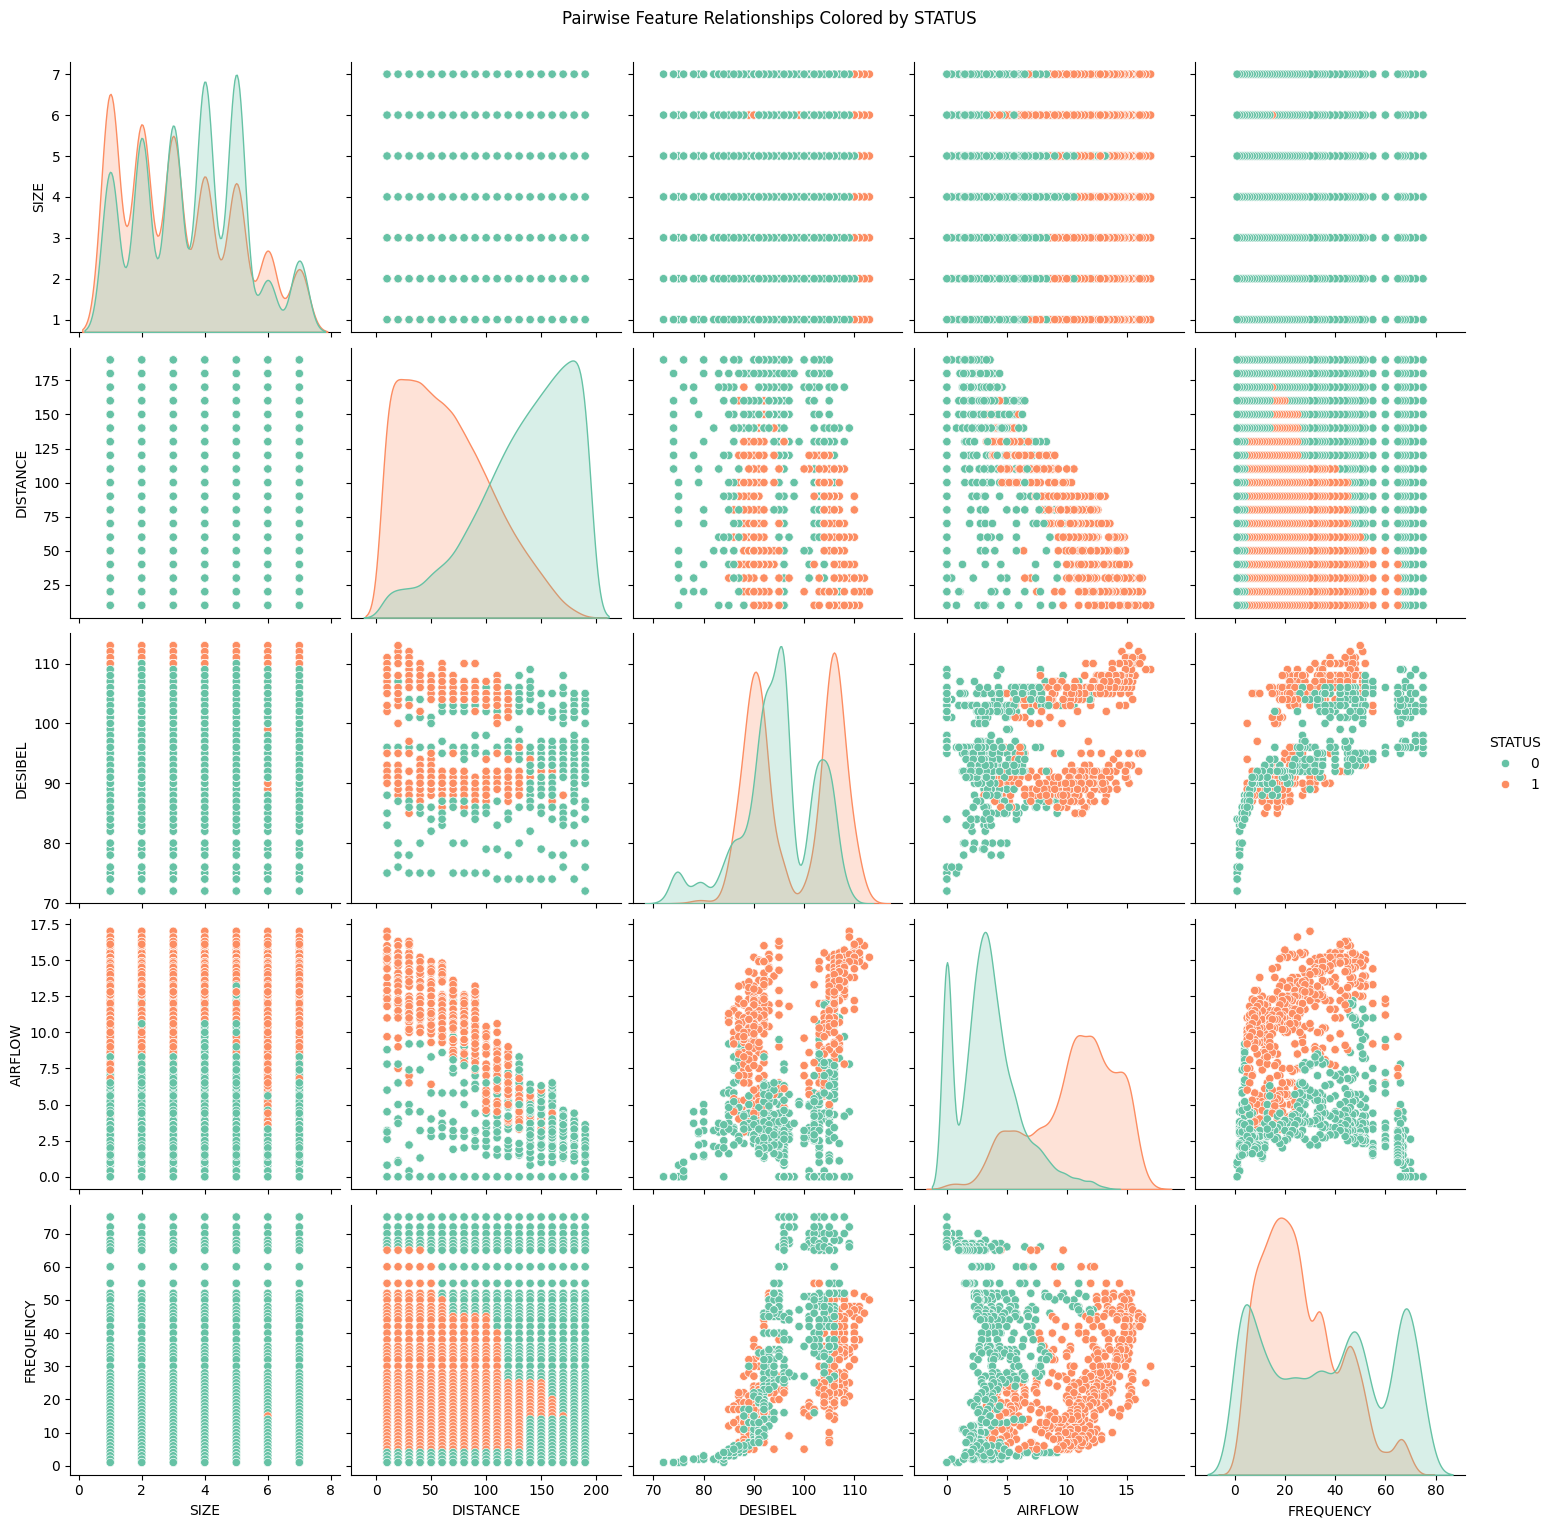

In [21]:
pairplot = sns.pairplot(dataset2, hue='STATUS', height=3, palette='Set2', diag_kind='kde')
pairplot.fig.suptitle('Pairwise Feature Relationships Colored by STATUS', y=1.02)

Feature Analysis
- Airflow and Distance show strongest effect on extinguishing the fire
- Frequency and Desibel follow right behind but with a staggering gap
- Fire size and Fuel Type have little to know effect on the results

C:\Users\Enzo\AppData\Local\Temp\ipykernel_45292\2590470238.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(effects.index, rotation=75, ha="right")


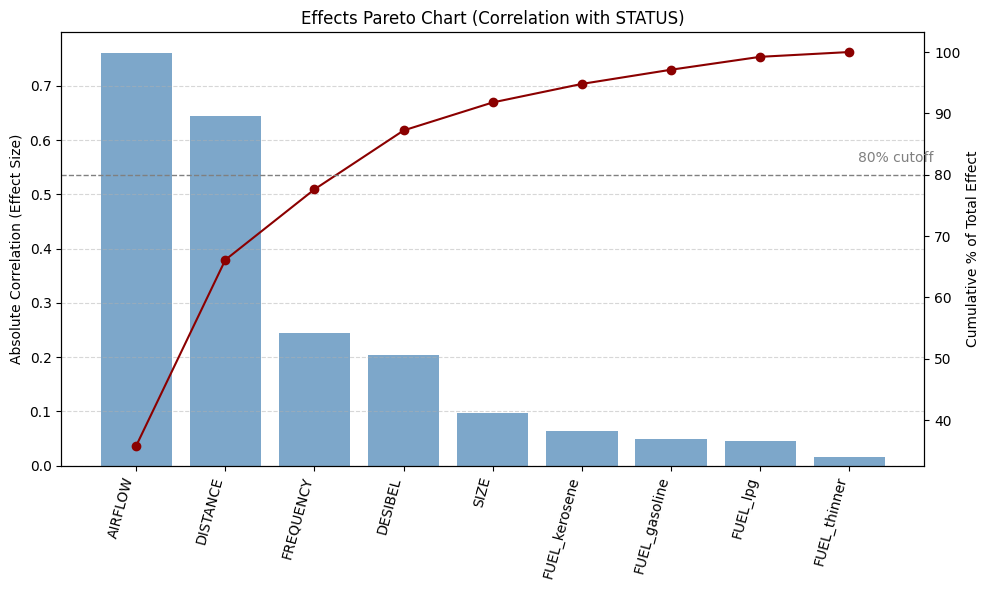

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# --- 2️⃣ Compute correlation with the target variable (STATUS) ---
corrs = dataset_ohe.corr()["STATUS"].drop("STATUS")

# --- 3️⃣ Rank by absolute effect size ---
effects = corrs.abs().sort_values(ascending=False)

# --- 4️⃣ Compute cumulative % contribution (Pareto line) ---
cum_pct = effects.cumsum() / effects.sum() * 100

# --- 5️⃣ Plot Pareto chart ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bars = effect magnitudes
ax1.bar(effects.index, effects.values, color="steelblue", alpha=0.7)
ax1.set_ylabel("Absolute Correlation (Effect Size)")
ax1.set_xticklabels(effects.index, rotation=75, ha="right")
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# Line = cumulative % of total
ax2 = ax1.twinx()
ax2.plot(effects.index, cum_pct, color="darkred", marker="o")
ax2.set_ylabel("Cumulative % of Total Effect")

# Add 80% reference line
ax2.axhline(80, color="gray", linestyle="--", linewidth=1)
ax2.text(len(cum_pct)*0.9, 82, "80% cutoff", color="gray")

# Title
plt.title("Effects Pareto Chart (Correlation with STATUS)")
plt.tight_layout()
plt.show()



Regression Analysis

Linear Regression: AIRFLOW ~ DISTANCE
R² Score: 0.5005
MSE: 11.2028
MAE: 2.4109
Slope: -0.0612
Intercept: 13.0931


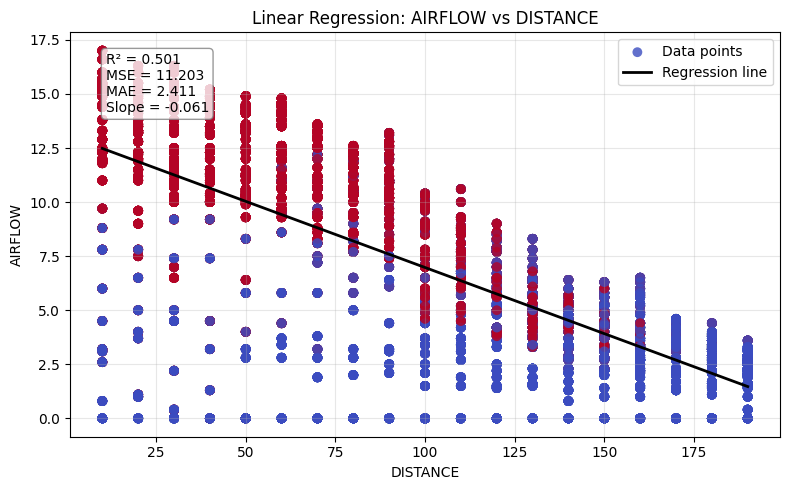

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# --- Choose your features ---
# feature_x = "DISTANCE"    # Independent variable
# feature_x = "DESIBEL_x_DISTANCE"    # Independent variable
feature_x = "DISTANCE"    # Independent variable
feature_y = "AIRFLOW"    # Dependent variable
# feature_y = ""    # Dependent variable
# feature_y = "DESIBEL_x_DISTANCE"    # Dependent variable

# --- Prepare the data ---
X = dataset_ohe[[feature_x]].values   # make sure it's 2D
y = dataset_ohe[feature_y].values
status = dataset_ohe["STATUS"]

# Fit linear regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Compute metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
slope = model.coef_[0]
intercept = model.intercept_

# Print metrics
print(f"Linear Regression: {feature_y} ~ {feature_x}")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")

# --- Plot ---
plt.figure(figsize=(8, 5))

# Scatter colored by STATUS
plt.scatter(
    X, y,
    c=status,                    # color by STATUS (0/1)
    cmap="coolwarm",             # color palette
    edgecolors="none",
    alpha=0.8,
    s=50,
    label="Data points"
)

# Regression line
plt.plot(X, y_pred, color="black", linewidth=2, label="Regression line")

# Labels and styling
plt.title(f"Linear Regression: {feature_y} vs {feature_x}")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend()
plt.grid(alpha=0.3)

# Annotate metrics
plt.text(
    0.05, 0.95,
    f"R² = {r2:.3f}\nMSE = {mse:.3f}\nMAE = {mae:.3f}\nSlope = {slope:.3f}",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.8)
)

plt.tight_layout()
plt.show()

## Model Building with KNN
KNN Classification: Modelling

In [41]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import mglearn
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# X, y = mglearn.datasets.dataset #Here is the data, we can get this from excel sheet or SQL
X = dataset2.loc[:,'SIZE':'FREQUENCY']
y = dataset2['STATUS']
# # X, y = mglearn.datasets.dataset #Here is the data, we can get this from excel sheet or SQL
# X = dataset_ohe.loc[:,'SIZE':'FUEL_thinner']
# y = dataset_ohe['STATUS']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) #split into train =75%, test =25%

categorical_cols = ["FUEL"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numeric_cols)
        # ("num", "passthrough", numeric_cols)
    ]
)

knn_pipe = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("knn", KNeighborsClassifier(n_neighbors=5))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25,random_state=42)
knn_pipe.fit(X_train, y_train)
print("KNN Model Test accuracy:", knn_pipe.score(X_test, y_test))


KNN Model Test accuracy: 0.9587250630589315


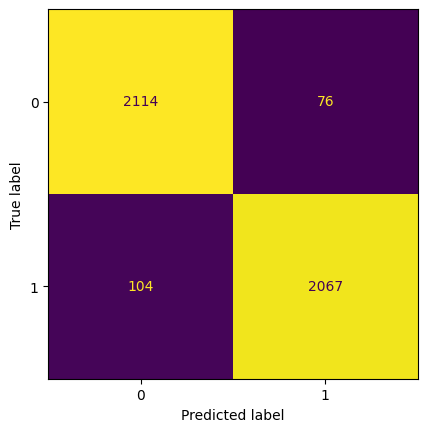

False positives: 76
False negatives: 104


In [42]:
y_pred = knn_pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_pipe.classes_)
disp.plot(colorbar=False)
plt.show()

TN, FP, FN, TP = cm.ravel()
print(f"False positives: {FP}")
print(f"False negatives: {FN}")

KNN Classification: Monte Carlo Cross Validation

In [26]:
neighbors_settings = np.unique(np.logspace(0.3, np.log10(300), num=20, dtype=int))
neighbors_settings

array([  1,   2,   3,   4,   5,   7,   9,  12,  16,  21,  27,  36,  47,
        61,  80, 104, 135, 176, 230, 300])

In [27]:
# Empty DataFrames to store results
lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()

# Define neighbors (log-spaced)
neighbors_settings = np.unique(np.logspace(0.3, np.log10(300), num=20, dtype=int))

# Monte Carlo cross-validation with multiple random seeds
for seedN in range(1, 20):
    # Split dataset with random seed
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, stratify=y, random_state=seedN
    )

    training_accuracy = []
    test_accuracy = []

    # Loop through neighbor counts
    for n_neighbors in neighbors_settings:
        # Build pipeline for each neighbor count
        knn_pipe = Pipeline(
            steps=[
                ("preprocess", preprocess),  # assumed to be predefined (e.g., StandardScaler, OneHotEncoder)
                ("knn", KNeighborsClassifier(n_neighbors=n_neighbors))
            ]
        )

        # Fit and score
        knn_pipe.fit(X_train, y_train)
        training_accuracy.append(knn_pipe.score(X_train, y_train))
        test_accuracy.append(knn_pipe.score(X_test, y_test))

    # Store results by seed
    lahat_training[seedN] = training_accuracy
    lahat_test[seedN] = test_accuracy

# Optional: add index for neighbors
lahat_training.index = neighbors_settings
lahat_test.index = neighbors_settings

In [28]:
mean_test = lahat_test.mean(axis=1)

# Get the k value (index) that gives the highest mean test accuracy
best_k = mean_test.idxmax()
best_score = mean_test.max()

print(f"Best k: {best_k}, test accuracy: {best_score:.3f}")

Best k: 1, test accuracy: 0.961


In [29]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=neighbors_settings,
        y=lahat_training.mean(axis=1),
        mode="lines+markers",
        name="Training accuracy",
        error_y=dict(
            type="data",
            array=lahat_training.std(axis=1) / 2,
            visible=True
        )
    )
)

fig.add_trace(
    go.Scatter(
        x=neighbors_settings,
        y=lahat_test.mean(axis=1),
        mode="lines+markers",
        name="Test accuracy",
        error_y=dict(
            type="data",
            array=lahat_test.std(axis=1) / 8,
            visible=True
        )
    )
)

fig.update_layout(
    xaxis_title="n_neighbors",
    yaxis_title="Accuracy"
)

fig.show()

Viewing Classification Scheme for different feature combinations
- First Look Pairing Best KNN and Higher KNN
    - Holes observed within the classification model may indicate overfitting
    - Ideally we want to set up parameters that GUARANTEE the fire will be put out
- Desibel has minimum effect on airflow above 88.3 dB. Lowering Sound Below this now shows increasing airflow required to put fire out. Note this is only revealed on high K value. Low K value do not reveal this trend (Chance of Overfitting)
    - Generally unrealistic for Lower Airflow to have more capability to put fire out when desibel dereases
- Model is able to capture Increasing Distance generally needs increased airflow to put out fire. Distance slight effect of fire extinguish capability from 9.5cm to ~140cm after which performance is affected significantly by increasing distance.
- Promising Frequency at ~16-20 dB. Reveals stronger effect in putting out fire. Less Airflow is required

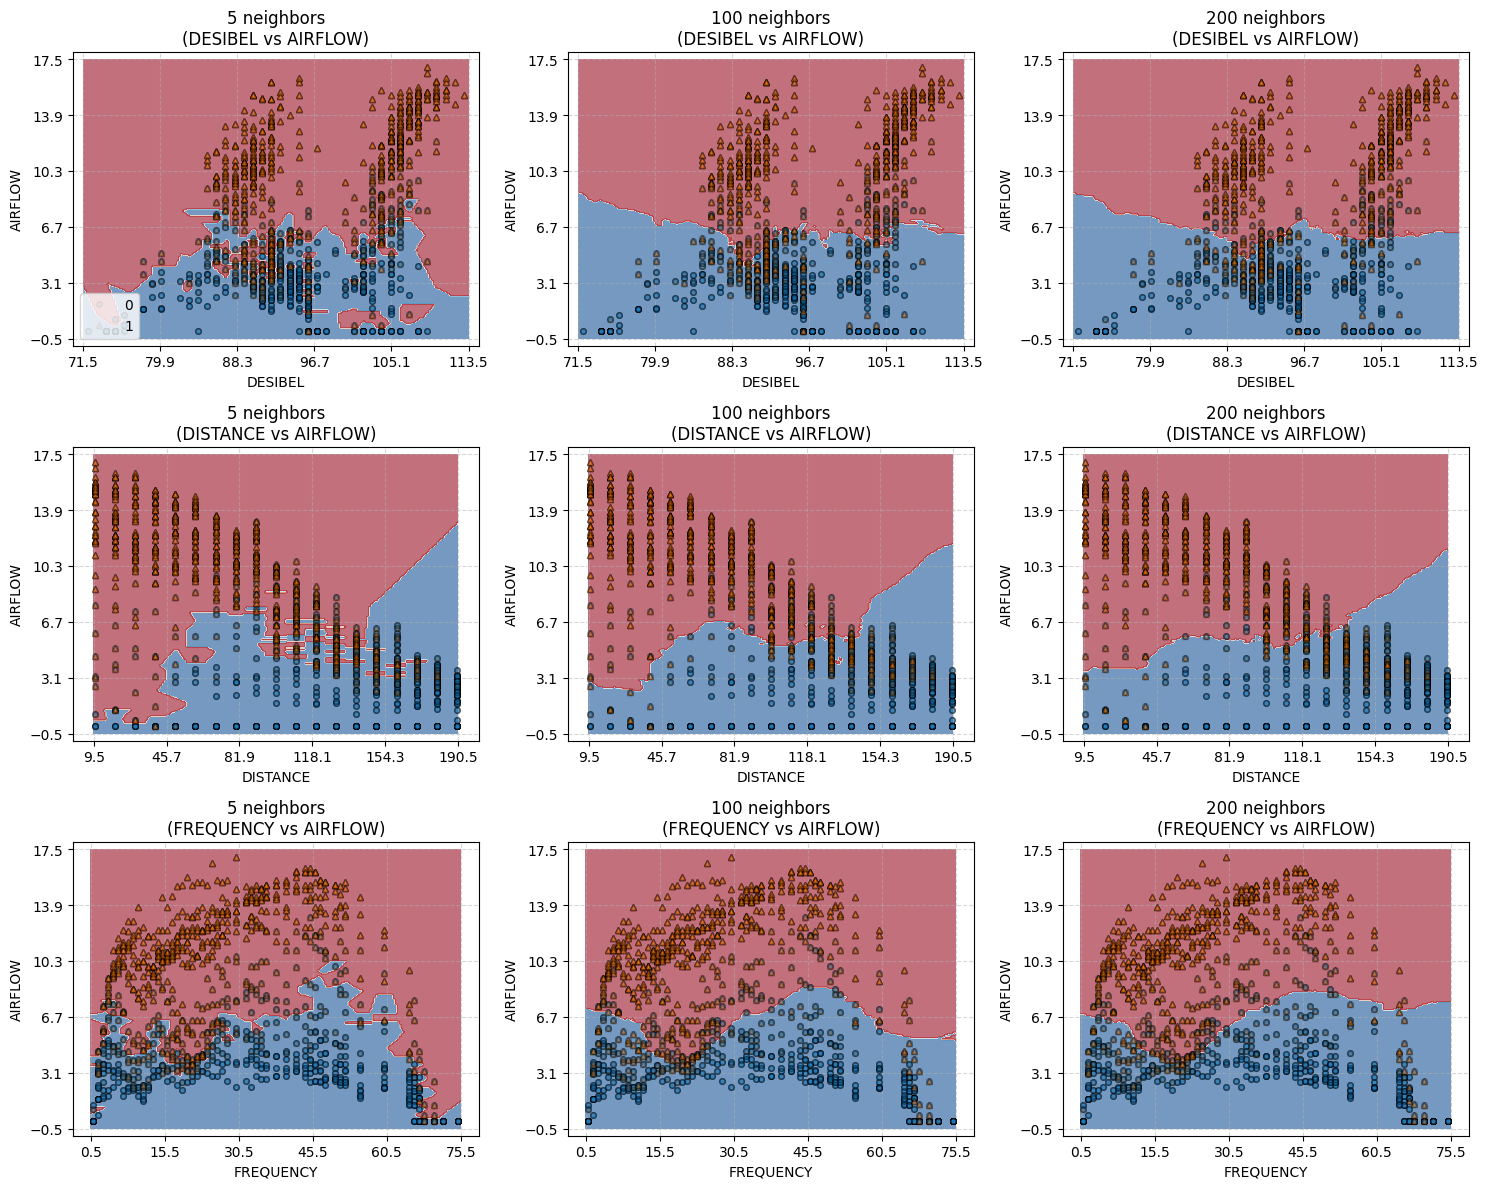

In [30]:
feature_combinations = [
    ["DESIBEL", "AIRFLOW" ],
    ["DISTANCE","AIRFLOW" ],
    ["FREQUENCY", "AIRFLOW"],
]
neighbor_settings = [5, 100, 200]
categorical_cols = ["FUEL"]

fig, axes = plt.subplots(len(feature_combinations), len(neighbor_settings),
                         figsize=(5 * len(neighbor_settings), 4 * len(feature_combinations)))

# keep axes 2‑D
axes = np.atleast_2d(axes)

mode_fuel = X["FUEL"].mode().iloc[0]  # value used for the grid

for row_idx, (feat_x, feat_y) in enumerate(feature_combinations, start=0):
    numeric_cols = [feat_x, feat_y]
    cols_for_fit = numeric_cols + categorical_cols
    X_subset = X[cols_for_fit].copy()
    y_subset = y

    preprocess = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
            ("num", StandardScaler(), numeric_cols)
        ],
        remainder="drop"
    )

    pipe = Pipeline(
        steps=[
            ("preprocess", preprocess),
            ("knn", KNeighborsClassifier())
        ]
    )

    for col_idx, n_neighbors in enumerate(neighbor_settings, start=0):
        ax = axes[row_idx, col_idx]

        pipe.set_params(knn__n_neighbors=n_neighbors)
        pipe.fit(X_subset, y_subset)

        x_min, x_max = X_subset[feat_x].min() - 0.5, X_subset[feat_x].max() + 0.5
        y_min, y_max = X_subset[feat_y].min() - 0.5, X_subset[feat_y].max() + 0.5
        xx, yy = np.meshgrid(
            np.linspace(x_min, x_max, 200),
            np.linspace(y_min, y_max, 200)
        )

        grid = pd.DataFrame({
            feat_x: xx.ravel(),
            feat_y: yy.ravel(),
            "FUEL": mode_fuel  # keeps categorical input valid
        })
        Z = pipe.predict(grid).reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.6, cmap="RdBu_r")
        mglearn.discrete_scatter(
            X_subset[feat_x],
            X_subset[feat_y],
            y_subset,
            ax=ax,
            s=4,
            alpha=0.05  # pick your opacity: 0 transparent → 1 opaque
        )

        ax.set_title(f"{n_neighbors} neighbors\n({feat_x} vs {feat_y})")
        ax.set_xlabel(feat_x)
        ax.set_ylabel(feat_y)
        ax.set_xticks(np.linspace(x_min, x_max, 6))
        ax.set_yticks(np.linspace(y_min, y_max, 6))
        ax.grid(True, linestyle="--", alpha=0.5)

        if row_idx == 0 and col_idx == 0:
            ax.legend(loc=3)

plt.tight_layout()
plt.show()

Viewing Classification of Less Important Features. Desibel and Frequency
- ~17-18 Hz Best Effective Frequency Target. Able to extinguish Fires over a long distance
- ~90 dB Minimum Sound Required to Effectively Extinguish Fires
- Missing Data for Desibel tests between 95 to 104 causing model to predict trench-like pattern. Currently assuming effect is due to missing data rather a real physical 

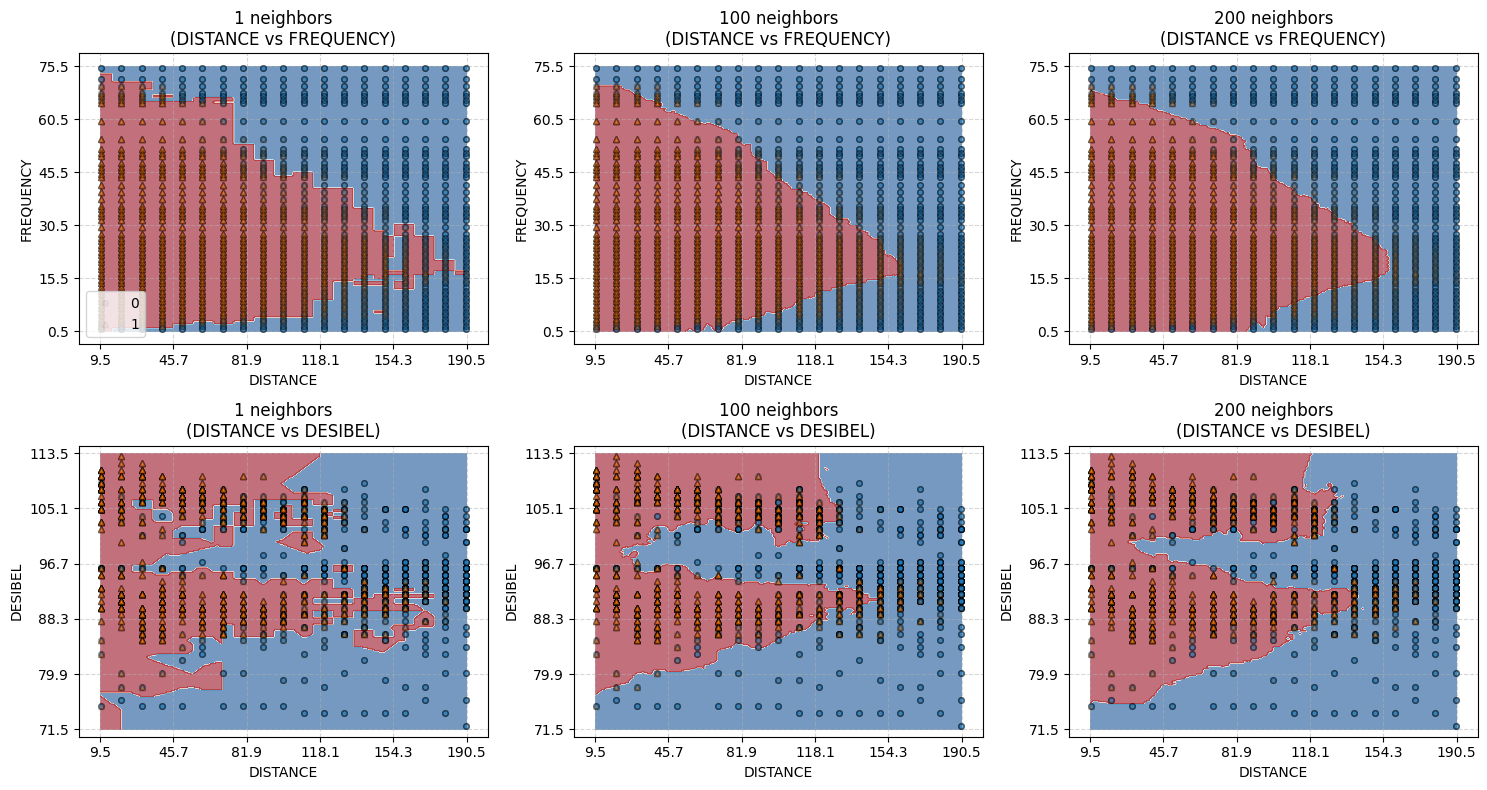

In [31]:
feature_combinations = [
    ["DISTANCE", "FREQUENCY"],
    ["DISTANCE", "DESIBEL"]
]
neighbor_settings = [1, 100, 200]
categorical_cols = ["FUEL"]

fig, axes = plt.subplots(len(feature_combinations), len(neighbor_settings),
                         figsize=(5 * len(neighbor_settings), 4 * len(feature_combinations)))

# keep axes 2‑D
axes = np.atleast_2d(axes)

mode_fuel = X["FUEL"].mode().iloc[0]  # value used for the grid

for row_idx, (feat_x, feat_y) in enumerate(feature_combinations, start=0):
    numeric_cols = [feat_x, feat_y]
    cols_for_fit = numeric_cols + categorical_cols
    X_subset = X[cols_for_fit].copy()
    y_subset = y

    preprocess = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
            ("num", StandardScaler(), numeric_cols)
        ],
        remainder="drop"
    )

    pipe = Pipeline(
        steps=[
            ("preprocess", preprocess),
            ("knn", KNeighborsClassifier())
        ]
    )

    for col_idx, n_neighbors in enumerate(neighbor_settings, start=0):
        ax = axes[row_idx, col_idx]

        pipe.set_params(knn__n_neighbors=n_neighbors)
        pipe.fit(X_subset, y_subset)

        x_min, x_max = X_subset[feat_x].min() - 0.5, X_subset[feat_x].max() + 0.5
        y_min, y_max = X_subset[feat_y].min() - 0.5, X_subset[feat_y].max() + 0.5
        xx, yy = np.meshgrid(
            np.linspace(x_min, x_max, 200),
            np.linspace(y_min, y_max, 200)
        )

        grid = pd.DataFrame({
            feat_x: xx.ravel(),
            feat_y: yy.ravel(),
            "FUEL": mode_fuel  # keeps categorical input valid
        })
        Z = pipe.predict(grid).reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.6, cmap="RdBu_r")
        mglearn.discrete_scatter(
            X_subset[feat_x],
            X_subset[feat_y],
            y_subset,
            ax=ax,
            s=4,
            alpha=0.05  # pick your opacity: 0 transparent → 1 opaque
        )

        ax.set_title(f"{n_neighbors} neighbors\n({feat_x} vs {feat_y})")
        ax.set_xlabel(feat_x)
        ax.set_ylabel(feat_y)
        ax.set_xticks(np.linspace(x_min, x_max, 6))
        ax.set_yticks(np.linspace(y_min, y_max, 6))
        ax.grid(True, linestyle="--", alpha=0.5)

        if row_idx == 0 and col_idx == 0:
            ax.legend(loc=3)

plt.tight_layout()
plt.show()

## Principle Chance Criterion

Population per class:      0
0  8759
1  8683
Proportion Chance Criterion: 50.00%
1.25 * Proportion Chance Criterion: 62.50%


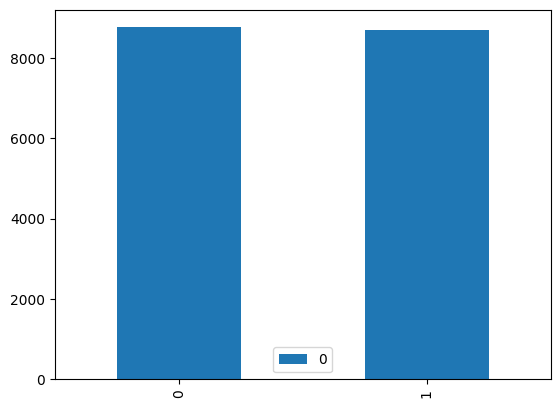

In [32]:
import numpy as np
from collections import Counter
state_counts = Counter(y)
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.plot(kind='bar')

num=(df_state[0]/df_state[0].sum())**2

print("Population per class:{}".format(df_state))
print("Proportion Chance Criterion: {:0.2f}%".format(100*num.sum()))
print("1.25 * Proportion Chance Criterion: {:0.2f}%".format(1.25*100*num.sum()))